In [68]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import glob

In [122]:
paths = glob.glob(rf'C:\Users\mqalborn\Desktop\ET_3SEB\results\LAI/*.csv')
paths_prosail = [item for item in paths if 'PROSAIL' in item]
paths_modis = [item for item in paths if 'MODIS' in item]

def read_csv(path):
    df = pd.read_csv(path)
    sat = os.path.basename(path).split('_')[1]
    df.loc[:, 'satellite'] = sat
    return df

pd_prosail = [read_csv(XX) for XX in paths_prosail]
pd_prosail = pd.concat(pd_prosail).drop('Unnamed: 0', axis=1)

con = pd_prosail.satellite == 'L08'
pd_prosail.loc[con, 'date'] = pd.to_datetime(pd_prosail[con].id.str.split('_', expand=True)[4]).dt.date
con = pd_prosail.satellite == 'S2'
pd_prosail.loc[con, 'date'] = pd.to_datetime(pd_prosail[con].id.str.split('_', expand=True)[1].str.split('T', expand=True)[0]).dt.date

# pd_prosail.loc[:, 'date'] = pd.to_datetime(pd_prosail.id.str.split('_', expand=True)[4]).dt.date
pd_prosail = pd_prosail.reset_index()
print(pd.unique(pd_prosail.block))
con = pd_prosail.block.isin(['NCC', 'CC'])
pd_prosail.loc[con, 'farm'] = 'BLS'
pd_prosail.loc[-con, 'farm'] = 'RIP720'
pd_prosail.loc[:, 'product'] = 'PROSAIL'
# print(pd_prosail.head())

['NCC' 'CC' 721 723 722 724]


In [114]:

# con = pd_prosail.satellite == 'S2
# pd_prosail.loc[con, 'date2'] = pd.to_datetime(pd_prosail[con].id.str.split('_', expand=True)[1].str.split('T')[0]).dt.date


In [123]:
pd_modis = [pd.read_csv(XX) for XX in paths_modis]
pd_modis = pd.concat(pd_modis).drop(['geometry', 'system:time_start'], axis=1)
pd_modis.loc[:, 'satellite'] = 'L0X'
pd_modis.rename(columns={'solar_time': 'date', 'LAI_mean': 'LAI', 'LAI_stdDev': 'LAI_std'}, inplace=True)
pd_modis.loc[:, 'date'] = pd.to_datetime(pd_modis.date).dt.date
pd_modis = pd_modis.reset_index()
# print(pd_modis.head())

con = pd_modis.block.isin(['NCC', 'CC'])
pd_modis.loc[con, 'farm'] = 'BLS'
pd_modis.loc[-con, 'farm'] = 'RIP720'
pd_modis.loc[:, 'product'] = 'L0X_MODIS'
# sns.lineplot(data=pd_modis, x='date', y='LAI', hue='farm')

In [124]:
pd_prosail = pd_prosail[['product', 'farm', 'block', 'satellite', 'date', 'LAI', 'LAI_std']]
pd_modis = pd_modis[['product', 'farm', 'block', 'satellite', 'date', 'LAI', 'LAI_std']]
dataset = pd.concat([pd_prosail, pd_modis]).reset_index()

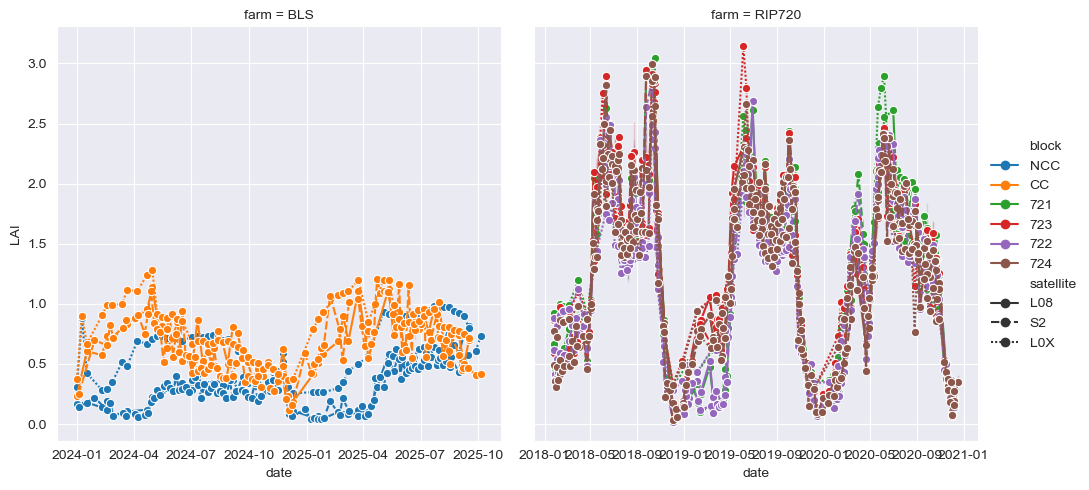

In [133]:
# dataset_filtered = dataset[dataset.satellite == 'L08']

sns.relplot(data=dataset, x='date', y='LAI', col='farm', hue='block',
            # row='satellite', row_order=['S2', 'L08', 'L0X'],
            style='satellite',
            kind='line', marker='o', facet_kws={'sharex': False})